In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [19]:
def rotate(img, angle=0):

    rows, cols, _ = img.shape
    M = cv2.getRotationMatrix2D((cols/2,rows/2), angle, 1)
    timg = cv2.warpAffine(img, M, (cols,rows))
    return timg

def average_blur(img, kdim=8):

    timg = cv2.blur(img, (kdim, kdim))
    return timg

def gaussian_blur(img, kdim=8, var=5):

    try:
        timg = cv2.GaussianBlur(img, (kdim, kdim), var)
        return timg
    except:
        if(ksize[0]%2==0):
            print("kernel dimension cannot be even for gaussian blur.")

def gaussian_noise(img, var=10, mean=0):

    row, col, _ = img.shape
    sigma = var ** 0.5
    gaussian = np.random.normal(mean,sigma,(row, col))
    timg = np.zeros(img.shape, np.float32)
    timg[:, :, 0] = img[:, :, 0] + gaussian
    timg[:, :, 1] = img[:, :, 1] + gaussian
    timg[:, :, 2] = img[:, :, 2] + gaussian
    cv2.normalize(timg, timg, 0, 255, cv2.NORM_MINMAX, dtype=-1)
    timg = timg.astype(np.uint8)
    return timg

def sharpen(img, kdim=5, sigma=1.0, amount=1.0, threshold=0):

    blurred = cv2.GaussianBlur(img, (kdim, kdim), sigma)
    timg = float(amount + 1) * img - float(amount) * blurred
    timg = np.maximum(timg, np.zeros(timg.shape))
    timg = np.minimum(timg, 255 * np.ones(timg.shape))
    timg = timg.round().astype(np.uint8)
    if threshold > 0:
        low_contrast_mask = np.absolute(img - blurred) < threshold
        np.copyto(timg, img, where=low_contrast_mask)
    return timg

def horizontal_flip(img):

    timg = cv2.flip(img, 1)
    return timg

def vertical_flip(img):

    timg = cv2.flip(img, 0)
    return timg

def perspective_transform(img, input_pts=np.float32([[0, 0], [32, 0], [0, 32], [32, 32]])):

    row, col, _ = img.shape
    output_pts=np.float32([[0, 0], [32, 0], [0, 32], [32, 32]])
    M = cv2.getPerspectiveTransform(input_pts, output_pts)
    timg = cv2.warpPerspective(img, M, (32, 32))
    return timg

def crop(img, input_pts=np.float32([[0, 0], [32, 0], [0, 32], [32, 32]])):

    row, col, _ = img.shape
    output_pts=np.float32([[0, 0], [32, 0], [0, 32], [32, 32]])
    M = cv2.getPerspectiveTransform(input_pts, output_pts)
    timg = cv2.warpPerspective(img, M, (32, 32))
    return timg

def random_erasing(img, region=np.array([[12, 12], [20, 12], [12, 20], [20, 20]]), randomize=False, grayIndex=0, mean=0, var=10):

    row, col, _ = img.shape
    sigma = var ** 0.5
    timg = img
    a = region[0, 0]
    b = region[1, 0]
    c = region[0, 1]
    d = region[2, 1]
    if randomize:
        gaussian = np.random.normal(mean, sigma, (b-a, d-c))
        timg[a:b, c:d, 0] = gaussian
        timg[a:b, c:d, 1] = gaussian
        timg[a:b, c:d, 2] = gaussian
        cv2.normalize(timg, timg, 0, 255, cv2.NORM_MINMAX, dtype=-1)
    else:
        patch = grayIndex*np.ones((b-a, d-c))
        timg[a:b, c:d, 0] = patch
        timg[a:b, c:d, 1] = patch
        timg[a:b, c:d, 2] = patch

    return timg

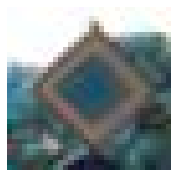

In [20]:
src = cv2.imread("./Samples/27595.jpg")
plt.figure(figsize=(3,3))
plt.imshow(src)
plt.axis('off')
plt.show()

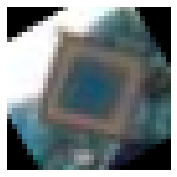

In [21]:
image = rotate(src, 30)
plt.figure(figsize=(3,3))
plt.imshow(image)
plt.axis('off')
plt.show()

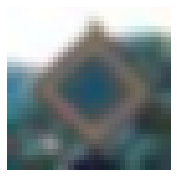

In [22]:
image = average_blur(src, 3)
plt.figure(figsize=(3,3))
plt.imshow(image)
plt.axis('off')
plt.show()

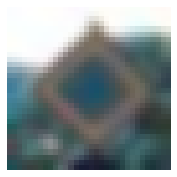

In [23]:
image = gaussian_blur(src, 3)
plt.figure(figsize=(3,3))
plt.imshow(image)
plt.axis('off')
plt.show()

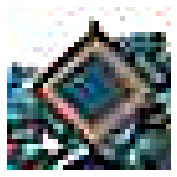

In [24]:
image = sharpen(src, amount=5)
plt.figure(figsize=(3,3))
plt.imshow(image)
plt.axis('off')
plt.show()

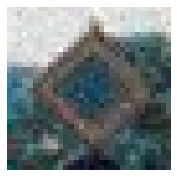

In [25]:
image = gaussian_noise(src, 100)
plt.figure(figsize=(3,3))
plt.imshow(image)
plt.axis('off')
plt.show()

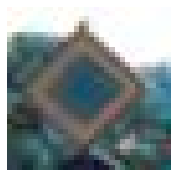

In [26]:
image = horizontal_flip(src)
plt.figure(figsize=(3,3))
plt.imshow(image)
plt.axis('off')
plt.show()

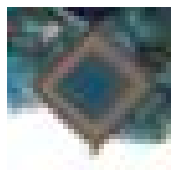

In [27]:
image = vertical_flip(src)
plt.figure(figsize=(3,3))
plt.imshow(image)
plt.axis('off')
plt.show()

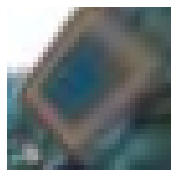

In [28]:
image = perspective_transform(src, np.float32([[1, 0], [28, 10], [3, 30], [31, 30]]))
plt.figure(figsize=(3,3))
plt.imshow(image)
plt.axis('off')
plt.show()

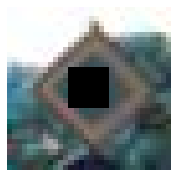

In [29]:
image = random_erasing(src)
plt.figure(figsize=(3,3))
plt.imshow(image)
plt.axis('off')
plt.show()